Coronavirüs hastalığı 2019 (COVID-19), şiddetli akut solunum sendromu koronavirüs 2'nin (SARS-CoV-2) neden olduğu bulaşıcı bir hastalıktır. Hastalık ilk olarak 2019 yılında Çin'in Wuhan kentinde tanımlandı ve o zamandan beri küresel olarak yayıldı ve 2019-20 koronavirüs pandemisine yol açtı. Yaygın semptomlar ateş, öksürük ve nefes darlığını içerir. Kas ağrısı, balgam üretimi ve boğaz ağrısı daha az görülür. Teşhis edilen vaka sayısı başına ölüm oranı ortalama %3,4 olup, 20 yaşın altındakilerde %0,2'den 80 yaşın üzerindekilerde yaklaşık %15'e kadar değişmektedir.

**Veri Kaynağı (Tarih açısından)**: Johns Hopkins CSSE'nin 2019 Yeni Coronavirüs COVID-19 (2019-nCoV) Veri Havuzu

**Veri Kaynağı**: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio


In [104]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
covid_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.975600,112.27070
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.871900,12.56740
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.427900,53.68800
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.463700,-3.74920
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.165700,10.45150
5,NaN,"Korea, South",2020-03-17T10:33:03,8320,81,1407,35.907800,127.76690
6,France,France,2020-03-17T19:13:08,7652,148,12,46.227600,2.21370
7,NaN,Switzerland,2020-03-17T16:33:04,2700,40,4,46.818200,8.22750
8,Unknown,United Kingdom,2020-03-17T15:13:09,1950,2,52,55.378100,-3.43600
9,New York,US,2020-03-17T22:53:03,1706,13,0,42.165700,-74.94810


1. Write a Python program to display first 5 rows from COVID-19 dataset. Also print the dataset information and check the missing values.

In [105]:
covid_data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


In [106]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  154 non-null    object 
 1   Country/Region  312 non-null    object 
 2   Last Update     312 non-null    object 
 3   Confirmed       312 non-null    int64  
 4   Deaths          312 non-null    int64  
 5   Recovered       312 non-null    int64  
 6   Latitude        309 non-null    float64
 7   Longitude       309 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.6+ KB


In [107]:
covid_data.isna().sum()

Province/State    158
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            3
Longitude           3
dtype: int64

2. Write a Python program to get the latest number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.

In [108]:
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
result = covid_data.groupby('Country/Region')['Confirmed','Deaths', 'Recovered', 'Active'].sum().reset_index()
print(result)

                       Country/Region  Confirmed  Deaths  Recovered  Active
0                         Afghanistan         26       0          1      25
1                             Albania         55       1          0      54
2                             Algeria         60       4         12      44
3                             Andorra         39       0          1      38
4                          Antarctica          0       0          0       0
5                 Antigua and Barbuda          1       0          0       1
6                           Argentina         68       2          3      63
7                             Armenia         78       0          1      77
8                               Aruba          3       0          0       3
9                           Australia        452       5         23     424
10                            Austria        999       3          1     995
11                         Azerbaijan         28       1          6      21
12          

<ipython-input-108-94f7858e0a78>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



3. Write a Python program to get the latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise.

In [109]:
data = covid_data.groupby(['Country/Region','Province/State'])['Confirmed','Deaths','Recovered'].max()
pd.set_option('display.max_rows', None)
print(data)

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
               South Australia                      29       0          3
               Tasmania                              7       0          0
               Victoria                             94       0          8
               Western Australia                    31       1          0
Canada         Alberta                              74       0          0
               British Columbia                    103       4          4
               Grand Princess         

<ipython-input-109-64876ece4739>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



4. Write a Python program to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus(COVID19).

In [58]:
china_data=covid_data[covid_data['Country/Region'] == 'China']
china_data = china_data[['Province/State','Confirmed', 'Deaths', 'Recovered']]
result = china_data.sort_values(by='Confirmed',ascending = False)
result = result.reset_index(drop=True)
print(result)

    Province/State  Confirmed  Deaths  Recovered
0            Hubei      67799    3111      56003
1        Guangdong       1364       8       1307
2            Henan       1273      22       1250
3         Zhejiang       1232       1       1216
4            Hunan       1018       4       1014
5            Anhui        990       6        984
6          Jiangxi        935       1        934
7         Shandong        761       7        746
8          Jiangsu        631       0        631
9        Chongqing        576       6        570
10         Sichuan        540       3        520
11    Heilongjiang        482      13        456
12         Beijing        456       8        369
13        Shanghai        358       3        325
14           Hebei        318       6        310
15          Fujian        296       1        295
16         Guangxi        253       2        248
17         Shaanxi        246       3        236
18          Yunnan        176       2        172
19          Hainan  

5. Write a Python program to get the latest country wise deaths cases of Novel Coronavirus (COVID-19).



In [68]:
data = covid_data.groupby('Country/Region')['Deaths'].sum().reset_index()
result = data[data['Deaths']>0][['Country/Region', 'Deaths']]
result


,Country/Region,Deaths
1,Albania,1
2,Algeria,4
6,Argentina,2
9,Australia,5
10,Austria,3
11,Azerbaijan,1
12,Bahrain,1
16,Belgium,10
21,Brazil,1
23,Bulgaria,2


6. Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.



In [73]:

data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Recovered'] == 0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
result

<ipython-input-73-20014f4c7327>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


,Country/Region,Confirmed,Deaths,Recovered
1,Albania,55,1,0
4,Antarctica,0,0,0
5,Antigua and Barbuda,1,0,0
8,Aruba,3,0,0
14,Barbados,2,0,0
17,Benin,1,0,0
18,Bhutan,1,0,0
19,Bolivia,11,0,0
22,Brunei,56,0,0
23,Bulgaria,67,2,0


7. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) died.



In [74]:
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed'] == data['Deaths']]
result = result[['Country/Region','Confirmed','Deaths']]
result = result.sort_values('Confirmed',ascending = False)
result = result[result['Confirmed'] > 0]
result = result.reset_index(drop = True)
result

<ipython-input-74-e369cb0fdeda>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


,Country/Region,Confirmed,Deaths
0,Sudan,1,1


8. Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered

In [75]:
data = covid_data.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed'] == data['Recovered']]
result = result[['Country/Region','Confirmed','Recovered']]
result = result.sort_values('Confirmed', ascending = False)
result = result[result['Confirmed'] > 0]
result

<ipython-input-75-89e08475d928>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = covid_data.groupby('Country/Region')['Confirmed','Deaths', 'Recovered'].sum().reset_index()


,Country/Region,Confirmed,Recovered
106,Nepal,1,1


9. Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).

In [80]:
covid_data_sorted = covid_data.sort_values(by='Confirmed', ascending=False)
top_10_countries_data = covid_data_sorted.head(10)
selected_columns = top_10_countries_data[['Country/Region','Last Update', 'Confirmed', 'Deaths', 'Recovered']]
print(selected_columns)

   Country/Region          Last Update  Confirmed  Deaths  Recovered
0           China  2020-03-17T11:53:10      67799    3111      56003
1           Italy  2020-03-17T18:33:02      31506    2503       2941
2            Iran  2020-03-17T15:13:09      16169     988       5389
3           Spain  2020-03-17T20:53:02      11748     533       1028
4         Germany  2020-03-17T18:53:02       9257      24         67
5    Korea, South  2020-03-17T10:33:03       8320      81       1407
6          France  2020-03-17T19:13:08       7652     148         12
7     Switzerland  2020-03-17T16:33:04       2700      40          4
8  United Kingdom  2020-03-17T15:13:09       1950       2         52
9              US  2020-03-17T22:53:03       1706      13          0


10. Write a Python program to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 50.

<ipython-input-92-9a824f1e4fff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  r_data = covid_data.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()


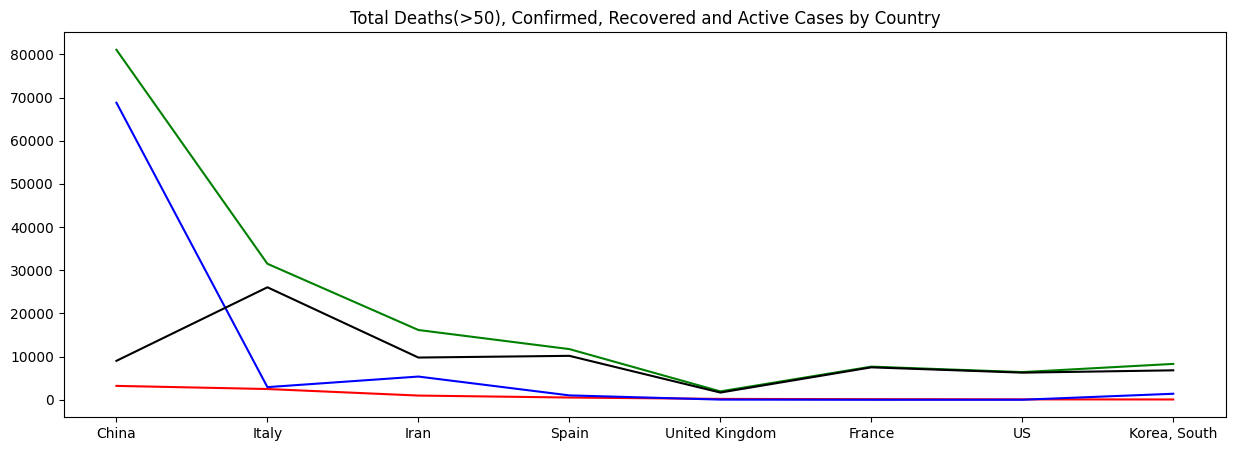

In [92]:
r_data = covid_data.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
r_data = r_data.sort_values(by='Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black')

plt.title('Total Deaths(>50), Confirmed, Recovered and Active Cases by Country')
plt.show()

11. Write a Python program to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA.

In [97]:
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province/State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

<ipython-input-97-3ee331fabf32>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



12. Write a Python program to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA.

In [98]:
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]

us_data = us_data.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()

<ipython-input-98-3807f431e3af>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



13. Write a Python program to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA.

In [99]:
combine_us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data = combine_us_data.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(combine_us_data, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()

<ipython-input-99-fa14f87d5a40>:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

<ipython-input-99-fa14f87d5a40>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



14. Write a Python program to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time.



In [103]:
pio.templates.default = "plotly_dark"

grouped = covid_data.groupby('Last Update')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

<ipython-input-103-068d4d3fc1cf>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

<ipython-input-103-068d4d3fc1cf>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

